## **Análise de Sentimentos usando Machine Learning**

Criando modelo simples para análise de sentimentos de tweets

In [1]:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

**Ler arquivo de dados e conta a quantidade de linhas**

In [2]:
dataset = pd.read_csv('Tweets_Mg.csv', encoding='utf-8')
dataset.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Exibe as 50 primeiras lihas de tweets**

In [3]:
dataset.Text.head(50)

0     ���⛪ @ Catedral de Santo Antônio - Governador ...
1     � @ Governador Valadares, Minas Gerais https:/...
2     �� @ Governador Valadares, Minas Gerais https:...
3                           ��� https://t.co/BnDsO34qK0
4     ��� PSOL vai questionar aumento de vereadores ...
5     " bom é bandido morto"\nDeputado Cabo Júlio é ...
6     "..E 25% dos mineiros dizem não torcer para ti...
7     "A gigantesca barba do mal" em destaque no cad...
8     "BB e governo de Minas travam disputa sobre de...
9     "com vcs bh fica pequena!" Belo Horizonte (pro...
10    "Daí a gente visita governador valadares"\n"Qu...
11    "É bonita e é bonita..." \n#latergram #ibituru...
12    "erro desconhecido" é mato! Aliás, é da secret...
13    "La La Land: Cantando Estações" arrasa no Glob...
14    "La La Land: Cantando Estações" arrasa no Glob...
15    "Los abusos, aun en el estado más sólido, son ...
16    "Mesmo sem muito dinheiro no caixa o governo d...
17    "Modelo de segurança será o nosso legado",

**Conta a quantidade de linhas de tweets neutros, positivos e negativos**

In [4]:
dataset[dataset.Classificacao=='Neutro'].count()

Unnamed: 0                   2453
Created At                   2453
Text                         2453
Geo Coordinates.latitude      102
Geo Coordinates.longitude     102
User Location                1712
Username                     2453
User Screen Name             2453
Retweet Count                2453
Classificacao                2453
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [5]:
dataset[dataset.Classificacao=='Positivo'].count()

Unnamed: 0                   3300
Created At                   3300
Text                         3300
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                2118
Username                     3300
User Screen Name             3300
Retweet Count                3300
Classificacao                3300
Observação                      1
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

In [6]:
dataset[dataset.Classificacao=='Negativo'].count()

Unnamed: 0                   2446
Created At                   2446
Text                         2446
Geo Coordinates.latitude        1
Geo Coordinates.longitude       1
User Location                1659
Username                     2446
User Screen Name             2446
Retweet Count                2446
Classificacao                2446
Observação                      0
Unnamed: 10                     0
Unnamed: 11                     0
Unnamed: 12                     0
Unnamed: 13                     0
Unnamed: 14                     0
Unnamed: 15                     0
Unnamed: 16                     0
Unnamed: 17                     0
Unnamed: 18                     0
Unnamed: 19                     0
Unnamed: 20                     0
Unnamed: 21                     0
Unnamed: 22                     0
Unnamed: 23                     0
Unnamed: 24                     0
dtype: int64

<AxesSubplot:>

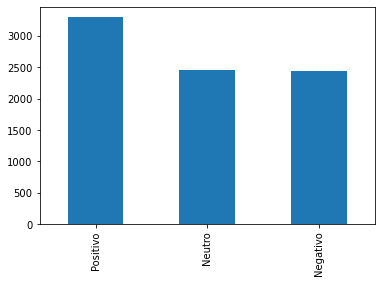

In [7]:
%matplotlib inline
dataset.Classificacao.value_counts().plot(kind='bar')

## Pre-Processamento dos Dados

* Remove linhas duplicadas na base de dados
    - Problema na coleta dos dados.
* Remove Stopwords
* Faz Stemming nos dados
* Remove caracteres indesejados como links, pontuação etc.

In [8]:
dataset.drop_duplicates(['Text'], inplace=True)

In [9]:
dataset.Text.count()

5765

## **Separando tweets e suas Classes**

In [10]:
tweets = dataset['Text']
classes = dataset['Classificacao']

## Criando o modelo

**Instancia o objeto que faz a vetorização dos dados de texto**

In [11]:
vectorizer = CountVectorizer(analyzer="word")

**Aplica o vetorizador nos dados de texto**

In [12]:
freq_tweets = vectorizer.fit_transform(tweets)
type(freq_tweets)

scipy.sparse.csr.csr_matrix

In [13]:
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

**Formato (Linhas, Colunas) da matriz**

In [14]:
freq_tweets.shape

(5765, 13029)

**Matriz**

In [15]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Testando o modelo com algumas instâncias simples**

In [16]:
# defina instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

**Aplica a função de Pré-processamento nos dados**

In [17]:
# Transforma os dados de teste em vetores de palavras.
freq_testes = vectorizer.transform(testes)

In [18]:
# Fazendo a classificação com o modelo treinado.
for t, c in zip (testes,modelo.predict(freq_testes)):
    print(f"{t}, {c}")

Esse governo está no início, vamos ver o que vai dar, Neutro
Estou muito feliz com o governo de Minas esse ano, Neutro
O estado de Minas Gerais decretou calamidade financeira!!!, Negativo
A segurança desse país está deixando a desejar, Neutro
O governador de Minas é mais uma vez do PT, Neutro


In [19]:
# Probabilidades de cada classe
print(modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.18, 0.82, 0.  ],
       [0.02, 0.98, 0.  ],
       [0.99, 0.01, 0.  ],
       [0.1 , 0.89, 0.01],
       [0.15, 0.85, 0.  ]])

## **Criando modelos com Pipelines**

* Pipelines são interessantes para reduzir código e automatizar fluxos

In [20]:
from sklearn.pipeline import Pipeline

In [21]:
pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])

In [28]:
#treinando o pipeline_simples
pipeline_simples.fit(tweets,classes)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

In [31]:
#imprimindo as etapas do pipeline
pipeline_simples.steps

[('counts', CountVectorizer()), ('classifier', MultinomialNB())]

## Separando dados de Treino e Teste

In [54]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(tweets,classes,test_size=0.2)#sem random_state fica aleatorio 

#### Gerando o modelo com dados de treino

In [80]:
pipeline_simples.fit(X_train,y_train)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

#### Gerando uma data aleatória para compor nossos dados

In [81]:
data = pd.date_range(start='1/1/2015',periods=len(X_test))
data

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20',
               '2018-02-21', '2018-02-22', '2018-02-23', '2018-02-24',
               '2018-02-25', '2018-02-26'],
              dtype='datetime64[ns]', length=1153, freq='D')

## Validando os Modelos com Validação Cruzada

* Fazendo o cross validation do modelo

In [70]:
resultados = cross_val_predict(pipeline_simples, tweets, classes, cv=10)
resultados

array(['Neutro', 'Neutro', 'Neutro', ..., 'Positivo', 'Positivo',
       'Positivo'], dtype='<U8')

In [71]:
len(resultados)

5765

* Medindo a acurácia média do modelo

In [72]:
metrics.accuracy_score(classes,resultados)

0.8716392020815265

* Medidas de validação do modelo

In [73]:
sentimento=['Positivo','Negativo','Neutro']
print(metrics.classification_report(classes,resultados,sentimento))

              precision    recall  f1-score   support

    Positivo       0.95      0.89      0.92      2840
    Negativo       0.80      0.87      0.83       951
      Neutro       0.81      0.84      0.83      1974

    accuracy                           0.87      5765
   macro avg       0.85      0.87      0.86      5765
weighted avg       0.88      0.87      0.87      5765



C:\Users\felip\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['Positivo', 'Negativo', 'Neutro'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


* Matriz de confusão

In [74]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['            Predito'], margins=True))

            Predito  Negativo  Neutro  Positivo   All
Real                                                 
Negativo                  832     111         8   951
Neutro                    175    1662       137  1974
Positivo                   37     272      2531  2840
All                      1044    2045      2676  5765


### Teste de Overfitting

In [75]:
#Resultados de predição
pipeline_simples.fit(X_train,y_train)
y_p = pipeline_simples.predict(X_test)

#Acurácia
metrics.accuracy_score(y_test,y_p)

0.9278779472954231

In [76]:
#Testando a classificação com os próprios valores de treino

#Resultados de predição
y_p = pipeline_simples.predict(X_train)

#Acurácia
metrics.accuracy_score(y_train,y_p)

0.9662271570668517

### Gerando um dataframe com os resultados

In [82]:
df = pd.DataFrame({'tweets':X_test,'classificação':pipeline_simples.predict(X_test),'data':data})
df.head()

,tweets,classificação,data
2139,Que enfermantes esas minas que por ponerle un ...,Neutro,2015-01-01
2188,Risco de calote de Estados com a União cresce ...,Neutro,2015-01-02
1234,Governo de Minas Gerais reconhece Folias de Re...,Neutro,2015-01-03
1335,https://t.co/DF4ICnJDCG Ações da Toyota caem a...,Neutro,2015-01-04
5390,Secretaria de Educação faz reformulações para ...,Positivo,2015-01-05


### Exportando os resultados para o disco

In [83]:
df.to_csv('resultado_class_tweets',sep=',',index=False)